In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure

In [11]:
CIFAR_FILENAME = "Results/cifar_30aug.csv"
irrelevant_columns = [
    'aug_type',
    'aug',
    'vcp',
    'translation',
    'noise',
    'edge_noise',
    'rotation',
    'swap',
]
distance_columns = [
    'dist_1',
    'dist_4',
    'cos_1',
    'cos_4'
]

In [12]:
cifar_results: pd.DataFrame = pd.read_csv(CIFAR_FILENAME)
cifar_results.drop(columns=irrelevant_columns, inplace=True)
cifar_results.head()

,epoch,model,loss,val_loss,accuracy,val_accuracy,dist_1,dist_4,cos_1,cos_4
0,1,cnn,1.77250731,1.529110193,0.34260416,0.44749999,NaN,NaN,NaN,NaN
1,2,cnn,1.462276101,1.379300237,0.469916672,0.497666657,NaN,NaN,NaN,NaN
2,3,cnn,1.319580674,1.266576529,0.526145816,0.542999983,NaN,NaN,NaN,NaN
3,4,cnn,1.183923125,1.126797676,0.577812493,0.592750013,NaN,NaN,NaN,NaN
4,5,cnn,1.059733391,1.064949274,0.62075001,0.629083335,NaN,NaN,NaN,NaN


In [13]:
cnn_results: pd.DataFrame = cifar_results.loc[cifar_results['model'] == 'cnn']\
                                         .drop(columns=distance_columns)
cnn_results.head()

,epoch,model,loss,val_loss,accuracy,val_accuracy
0,1,cnn,1.77250731,1.529110193,0.34260416,0.44749999
1,2,cnn,1.462276101,1.379300237,0.469916672,0.497666657
2,3,cnn,1.319580674,1.266576529,0.526145816,0.542999983
3,4,cnn,1.183923125,1.126797676,0.577812493,0.592750013
4,5,cnn,1.059733391,1.064949274,0.62075001,0.629083335


In [14]:
fcn_results: pd.DataFrame = cifar_results.loc[cifar_results['model'] == 'fcn'].reset_index(drop=True)
fcn_results.head()

,epoch,model,loss,val_loss,accuracy,val_accuracy,dist_1,dist_4,cos_1,cos_4
0,1,fcn,1.083310843,0.557351053,0.74529165,0.837333322,0,0,0,0
1,2,fcn,0.600552142,0.406038016,0.813020825,0.873333335,0.012122761,0.011913812,0.014463289,0.014005238
2,3,fcn,0.479956746,0.359244108,0.844041646,0.889999986,0.015959046,0.015632116,0.025032459,0.024129955
3,4,fcn,0.391555369,0.291036427,0.869583309,0.911000013,0.018890318,0.018451509,0.03501527,0.033570255
4,5,fcn,0.347377837,0.293635845,0.883374989,0.910916686,0.021267776,0.020716648,0.04431093,0.042292628


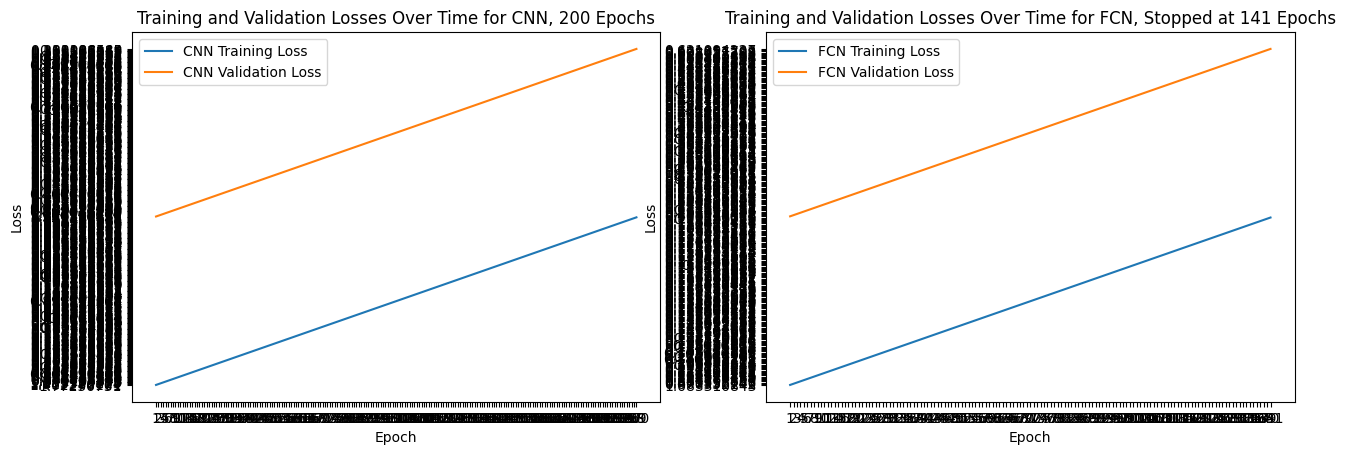

In [15]:
training_fig: Figure; cnn_ax: Axes; fcn_ax: Axes
training_fig, (cnn_ax, fcn_ax) = plt.subplots(1, 2)
training_fig.set_figwidth(15)
cnn_ax.plot(cnn_results['epoch'], cnn_results['loss'], label="CNN Training Loss")
cnn_ax.plot(cnn_results['epoch'], cnn_results['val_loss'], label="CNN Validation Loss")
fcn_ax.plot(fcn_results['epoch'], fcn_results['loss'], label="FCN Training Loss")
fcn_ax.plot(fcn_results['epoch'], fcn_results['val_loss'], label="FCN Validation Loss")
cnn_ax.set_xlabel("Epoch")
fcn_ax.set_xlabel("Epoch")
cnn_ax.set_ylabel("Loss")
fcn_ax.set_ylabel("Loss")
cnn_ax.set_title(f"Training and Validation Losses Over Time for CNN, {len(cnn_results)} Epochs")
fcn_ax.set_title(f"Training and Validation Losses Over Time for FCN, Stopped at {len(fcn_results)} Epochs")
cnn_ax.legend()
fcn_ax.legend()
plt.show()

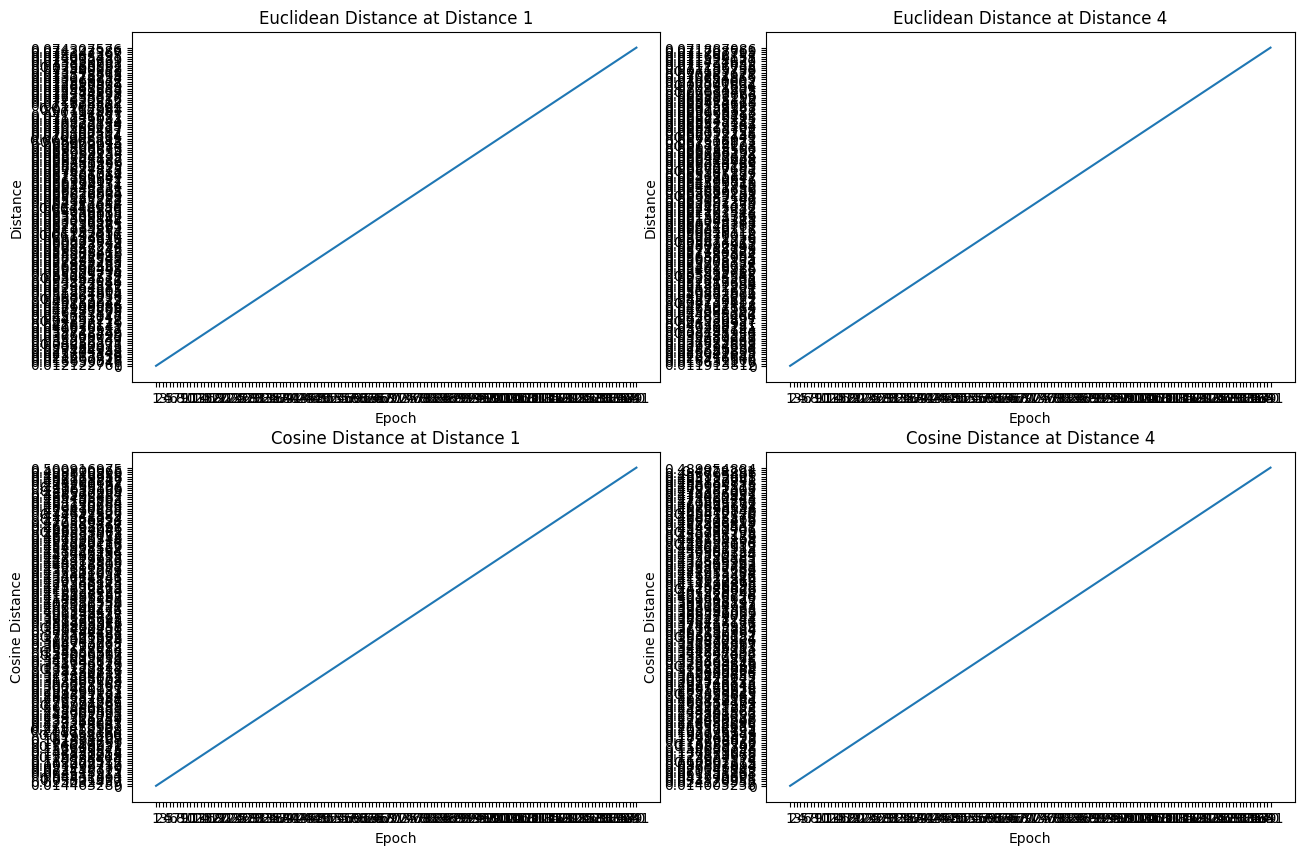

In [16]:
distance_fig: Figure; dist_1_ax: Axes; dist_4_ax: Axes; cos_1_ax: Axes; cos_4_ax: Axes
distance_fig, ((dist_1_ax, dist_4_ax), (cos_1_ax, cos_4_ax)) = plt.subplots(2, 2)
distance_fig.set_figwidth(15)
distance_fig.set_figheight(10)
dist_1_ax.plot(fcn_results['epoch'], fcn_results['dist_1'], label="Euclidean Distance at Distance 1")
dist_4_ax.plot(fcn_results['epoch'], fcn_results['dist_4'], label="Euclidean Distance at Distance 4")
cos_1_ax.plot(fcn_results['epoch'], fcn_results['cos_1'], label="Cosine Distance at Distance 1")
cos_4_ax.plot(fcn_results['epoch'], fcn_results['cos_4'], label="Cosine Distance at Distance 4")
dist_1_ax.set_xlabel("Epoch")
dist_1_ax.set_ylabel("Distance")
dist_4_ax.set_xlabel("Epoch")
dist_4_ax.set_ylabel("Distance")
cos_1_ax.set_xlabel("Epoch")
cos_1_ax.set_ylabel("Cosine Distance")
cos_4_ax.set_xlabel("Epoch")
cos_4_ax.set_ylabel("Cosine Distance")
dist_1_ax.set_title("Euclidean Distance at Distance 1")
dist_4_ax.set_title("Euclidean Distance at Distance 4")
cos_1_ax.set_title("Cosine Distance at Distance 1")
cos_4_ax.set_title("Cosine Distance at Distance 4")
plt.show()